# Project Description

Study a database, analyze data from competitors of Zuber, and test a hypothesis about the impact of weather on ride frequency.

## Step 1 : Exploratory data analysis

### 1. Take a Look at the 2 Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the datasets
company = pd.read_csv('project_sql_result_01.csv')
location = pd.read_csv('project_sql_result_04.csv ')

In [3]:
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
# Look at the datatypes
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Check duplicates
company.duplicated().sum()

0

In [8]:
location.duplicated().sum()

0

In [9]:
# Convert the average_trips column of location into integer type
location['average_trips'] = location['average_trips'].astype('int64')
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
location.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


**Description:**
1. The *company* dataset contains the names of companies and amount of trips of each company.
2. The *location* dataset contains the drop off locations and average trips of each location.
3. The datatypes are converted to the correct ones.

### 2. Identify the Top 10 Neighborhoods in Terms of Drop-offs

In [11]:
top_10_neighborhoods = location.sort_values(by = 'average_trips', ascending = False).head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [12]:
# The name of neighborhoods 
top_10_neighborhoods.dropoff_location_name.unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul'], dtype=object)

**Description:**

The top 10 neighborhoods in terms of drop-offs are:

*Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.*

### 3. Make Graphs: 

Taxi Companies and Number of Rides;

Top 10 Neighborhoods by Number of Dropoffs

In [13]:
# Taxi Companies and Number of Rides
# Sort the Company Dataset by Number of Rides
company_sort = company.sort_values(by = 'trips_amount', ascending = False).head(10)
company_sort

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


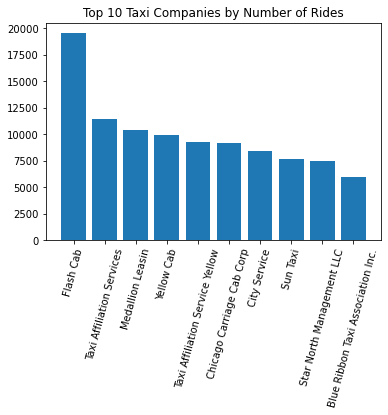

In [14]:
# Barplot for Companies
plt.bar(x = company_sort['company_name'], height = company_sort['trips_amount'])
plt.xticks(rotation = 75)
plt.title('Top 10 Taxi Companies by Number of Rides')
plt.show()

In [15]:
# The name of the top 10 companies
company_sort['company_name']

0                            Flash Cab
1            Taxi Affiliation Services
2                     Medallion Leasin
3                           Yellow Cab
4      Taxi Affiliation Service Yellow
5            Chicago Carriage Cab Corp
6                         City Service
7                             Sun Taxi
8            Star North Management LLC
9    Blue Ribbon Taxi Association Inc.
Name: company_name, dtype: object

**Description:**

In terms of number of rides, the top 10 companies are: 

*Flash Cab, Taxi Affiliation Services, Medallion Leasin, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, Blue Ribbon Taxi Association Inc.*

According to the bar chart, it is clear that *Flash Cab* has a very big advantage over the other 9 companies in terms of number of rides.

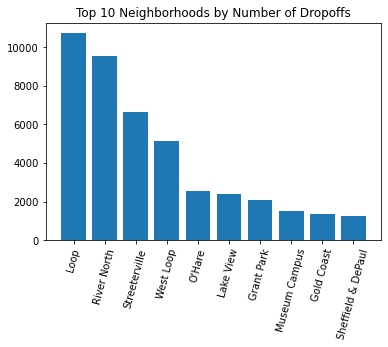

In [16]:
# Top 10 Neighborhoods by Number of Dropoffs
# Use the Dataset created before to make a Barplot
plt.bar(x = top_10_neighborhoods['dropoff_location_name'], height = top_10_neighborhoods['average_trips'])
plt.xticks(rotation = 75)
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.show()

**Description:**

In terms of number of dropoffs, the top 10 neighborhoods are: 

*Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.*

According to the bar chart, it is clear that *Loop, River North, Streeterville, West Loop, O'Hare* have very big advantage over the other 5 companies in terms of number of dropoffs.

## Step 2 : Testing hypotheses

### 1. Look at the relevant Dataset

In [17]:
from scipy import stats as st
import numpy as np
from datetime import datetime

In [18]:
weather = pd.read_csv('project_sql_result_07.csv')
weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [20]:
# Check duplicates
weather.duplicated().sum()

197

In [21]:
# Drop duplicates
weather = weather.drop_duplicates()
weather.duplicated().sum()

0

In [22]:
# Convert the start_ts column into the proper datatype
weather['start_ts'] = pd.to_datetime(weather['start_ts'], format='%Y-%m-%d %H:%M:%S')
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


In [23]:
# Find the values of weather_conditions column
weather.weather_conditions.unique()

array(['Good', 'Bad'], dtype=object)

### 2. Formation of Hypotheses:

H0 -- The **average duration of rides** from **Loop neighborhood** to **O'Hare International Airport** on **rainy Sundays** is *not different from* that on Sundays that are not rainy.

H1 -- The **average duration of rides** from **Loop neighborhood** to **O'Hare International Airport** on **rainy Sundays** is *different from* that on Sundays that are not rainy.

In [24]:
# Build dataset for rainy days
rainy = weather[weather['weather_conditions'] == 'Bad']
rainy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            148 non-null    datetime64[ns]
 1   weather_conditions  148 non-null    object        
 2   duration_seconds    148 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.6+ KB


In [25]:
# Build dataset for good days
good = weather[weather['weather_conditions'] == 'Good']
good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 1064
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            723 non-null    datetime64[ns]
 1   weather_conditions  723 non-null    object        
 2   duration_seconds    723 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 22.6+ KB


In [26]:
# exclude the outliers of rainy
zscores_rainy = st.zscore(rainy['duration_seconds'])
abs_zscore_rainy = np.abs(zscores_rainy)
filtered_rainy_duration = rainy[abs_zscore_rainy < 3]['duration_seconds']
filtered_rainy_duration.head()

6     2969.0
30    1980.0
34    2460.0
51    2760.0
52    2460.0
Name: duration_seconds, dtype: float64

In [27]:
# exclude the outliers of good
zscores_good = st.zscore(good['duration_seconds'])
abs_zscore_good = np.abs(zscores_good)
filtered_good_duration = good[abs_zscore_good < 3]['duration_seconds']
filtered_good_duration.head()

0    2410.0
1    1920.0
2    1543.0
3    2512.0
4    1440.0
Name: duration_seconds, dtype: float64

In [28]:
# Testing hypothesis 
print('Null hypothesis: The average duration of rides from Loop neighborhood to O\'Hare International Airport on rainy Sundays is not different from that on Sundays that are not rainy.')
print()
alpha = 0.05
results = st.ttest_ind(filtered_rainy_duration, filtered_good_duration)
print('p-value:', results.pvalue)
print()
if (results.pvalue < alpha):
        print("We reject the null hypothesis at the significance level of 5%")
else:
        print("We can't reject the null hypothesis at the significance level of 5%") 

Null hypothesis: The average duration of rides from Loop neighborhood to O'Hare International Airport on rainy Sundays is not different from that on Sundays that are not rainy.

p-value: 3.6052280777023347e-09

We reject the null hypothesis at the significance level of 5%


In [29]:
# Compare the average durations
print('The average duration of rides on rainy Sundays:', filtered_rainy_duration.mean())
print('The average duration of rides on non-rainy Sundays:', filtered_good_duration.mean())

The average duration of rides on rainy Sundays: 2391.7414965986395
The average duration of rides on non-rainy Sundays: 2007.3802228412255


**Descriptions:**

The **average duration of rides** from **Loop neighborhood** to **O'Hare International Airport** on **rainy Sundays** is *different from* that on Sundays that are not rainy at the significance of 5%.

The average duration of rides on rainy Sundays is *longer* than that of non-rainy Sundays.

## Conclusions:##

By studying the datasets from competitors, we can conclude that:

1. The top 10 neighborhoods in terms of drop-offs are:
*Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.*
*Loop, River North, Streeterville, West Loop, O'Hare* have very big advantage over the other 5 companies in terms of number of dropoffs.

2. In terms of number of rides, the top 10 companies are: 
*Flash Cab, Taxi Affiliation Services, Medallion Leasin, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, Blue Ribbon Taxi Association Inc.*
*Flash Cab* has a very big advantage over the other 9 companies in terms of number of rides.

3. The average duration of rides from *Loop neighborhood* to *O'Hare International Airport* on *rainy Sundays* is *longer* than that of non-rainy Sundays.

Suggestions for Zuber:

1. Take into account the top 5 neighborhoods that have the most dropoffs.

2. *Flash Cab* is the biggest competitor.

3. Make use of *rainy Sundays* to increase the income.